In [1]:
%reset -f

import os
import torch
import numpy as np
import random
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from torch.autograd import Variable

層名稱: dnn1.weight, Sydeny: 0.060096
層名稱: dnn1.weight, 復刻版: 0.026145
層名稱: dnn1.weight, 平均差異: 0.055669
層名稱: dnn1.bias, Sydeny: 0.151460
層名稱: dnn1.bias, 復刻版: 0.122765
層名稱: dnn1.bias, 平均差異: 0.274225
層名稱: rnn2.x2h.weight, Sydeny: 0.775723
層名稱: rnn2.x2h.weight, 復刻版: 0.162698
層名稱: rnn2.x2h.weight, 平均差異: 0.809645
層名稱: rnn2.h2h.weight, Sydeny: 1.759241
層名稱: rnn2.h2h.weight, 復刻版: 0.490602
層名稱: rnn2.h2h.weight, 平均差異: 1.902816
層名稱: dnn2.weight, Sydeny: 0.986072
層名稱: dnn2.weight, 復刻版: 0.107571
層名稱: dnn2.weight, 平均差異: 0.979883
層名稱: dnn2.bias, Sydeny: 0.122662
層名稱: dnn2.bias, 復刻版: 0.127402
層名稱: dnn2.bias, 平均差異: 0.250064


C:\Users\USER\AppData\Local\Temp\ipykernel_16068\574408245.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  your_state_dict = torch.load(your_model_path)
C:\Users\USER\Ap

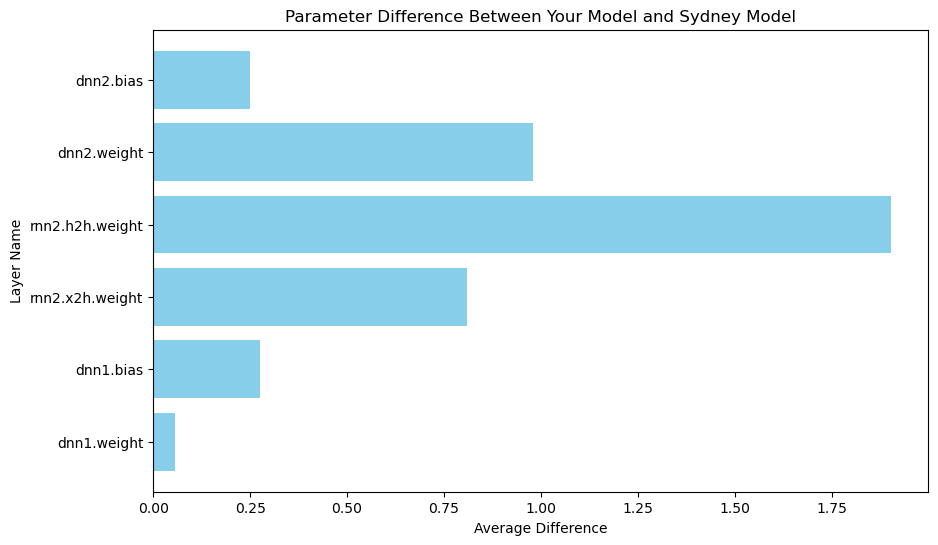

In [11]:
material = "Material C"

# 載入你的模型
your_model_path = f"./Model/{material}.pt"
your_state_dict = torch.load(your_model_path)

# 載入隊伍的模型
team_model_path = f"./OLD_thing/{material}.pt"
team_state_dict = torch.load(team_model_path)

# 比較每層參數
for key in your_state_dict.keys():
    if key in team_state_dict:
        team_state = torch.abs(team_state_dict[key]).mean()
        your_state = torch.abs(your_state_dict[key]).mean()
        diff = torch.abs(your_state_dict[key] - team_state_dict[key]).mean()
        print(f"層名稱: {key}, Sydeny: {team_state:.6f}")
        print(f"層名稱: {key}, 復刻版: {your_state:.6f}")
        print(f"層名稱: {key}, 平均差異: {diff:.6f}")
        print("========================================")
    else:
        print(f"層名稱: {key} 不存在於隊伍模型中")

layer_names = []
diff_values = []

for key in your_state_dict.keys():
    if key in team_state_dict:
        diff = torch.abs(your_state_dict[key] -
                         team_state_dict[key]).mean().item()
        layer_names.append(key)
        diff_values.append(diff)

plt.figure(figsize=(10, 6))
plt.barh(layer_names, diff_values, color='skyblue')
plt.xlabel("Average Difference")
plt.ylabel("Layer Name")
plt.title("Parameter Difference Between Your Model and Sydney Model")
plt.show()
